# End-to-End Machine Learning Project.

The goal is just to ilulustrate the main steps of a Machine Learning project, pretending to be a recently hired data scientist in a real estate company. The main steps you will go through:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor and maintain your system.


## Working with Real Data.
Here are a few places you can look to get data:

* Popular open data repositories:
  * [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
  * [Kaggle datasets](https://www.kaggle.com/datasets)
  * [Amazon’s AWS datasets](http://aws.amazon.com/fr/datasets/)
* Meta portals (they list open data repositories):
  * http://dataportals.org/
  * http://opendatamonitor.eu/
  * http://quandl.com/
* Other pages listing many popular open data repositories:
  * [Wikipedia’s list of Machine Learning datasets](https://goo.gl/SJHN2k)
  * [Quora.com question](http://goo.gl/zDR78y)
  * [Datasets subreddit](https://www.reddit.com/r/datasets)
  
In this example we chose the California Housing Price dataset from the StatLib repository. This data set was based on data from the 1990 California census. We also added a categorical attribute and removed a rew features for teaching purposes.

#### Look at the big picture

The problem is to build a model of housing prices in California using the dataset mentioned above. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short. **Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.**


#### Frame the problem

<img src="./img/ml_pipeline.png" alt="ml pipeline" title="A Machne Learning pipeline for real state investments." width="470" height="330" />
<center><strong>Figure 1.-</strong> A Machne Learning pipeline for real state investments. </center>

After get a look to the problem it is clearly a typical supervised learning task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price). It is also a typical regression task, since you are asked to predict a value. More specifically, this is a multivariate regression problem since the system will use multiple features to make a prediction (it will use the district’s population, the median income, etc.). Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

#### Select a Performance Measure
A typical performance measure for regression problems is the Root Mean Square Error (RMSE). In measures the *standard deviation* of the errors the system makes in its predictions.

\begin{equation*}
RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2}
\end{equation*}

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier districts. In that case, you may consider using the Mean Absolute Error

\begin{equation*}
MAE(X, h) = \frac{1}{m} \sum_{i=1}^m | h(x^{(i)}) - yx^{(i)}|
\end{equation*}

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of
predictions and the vector of target values. Various distance measures, or *norms*, are possible:

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the $\ell_2$ norm, noted $\| \cdot \|_2$ (or just $\| \cdot \|$).
* Computing the sum of absolutes (MAE) corresponds to the $\ell_1$ norm, noted $\| \cdot \|_1$. It is sometimes called the *Manhattan norm* because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.
* Molre generally, the $\ell_k$ *norm* of a vector **v** containing $n$ elements is defined as $\|v\|_k = (|v_0|^k+|v_1|^k + \cdots + |v_n|^k)^{\frac{1}{k}}$. $\ell_0$ just jives the number of non-zero elements in the vector, and $\ell_\infty$ gives the maximum absolute value in the vector.
* The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

### Get the Data

In [1]:
# Se utiliza la función fetch_housing_data para obtener los datos.
from fetch_housing_data import fetch_housing_data
fetch_housing_data()

In [2]:
# Observamos las estructura de los datos obtenidos. Se utiliza la función load_housing_data
# Take a Quicvk look at the data structure
from load_housing import load_housing_data

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Obtenemos la descripción de los datos utilizando housing.info()
#get a quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# mostramos las categorias (ocean proximity)
housing["ocean_proximity"].value_counts() #show categories

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()  # Mostramos la descripción de los datos numericos (housing.describe)
#show a summary of the numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


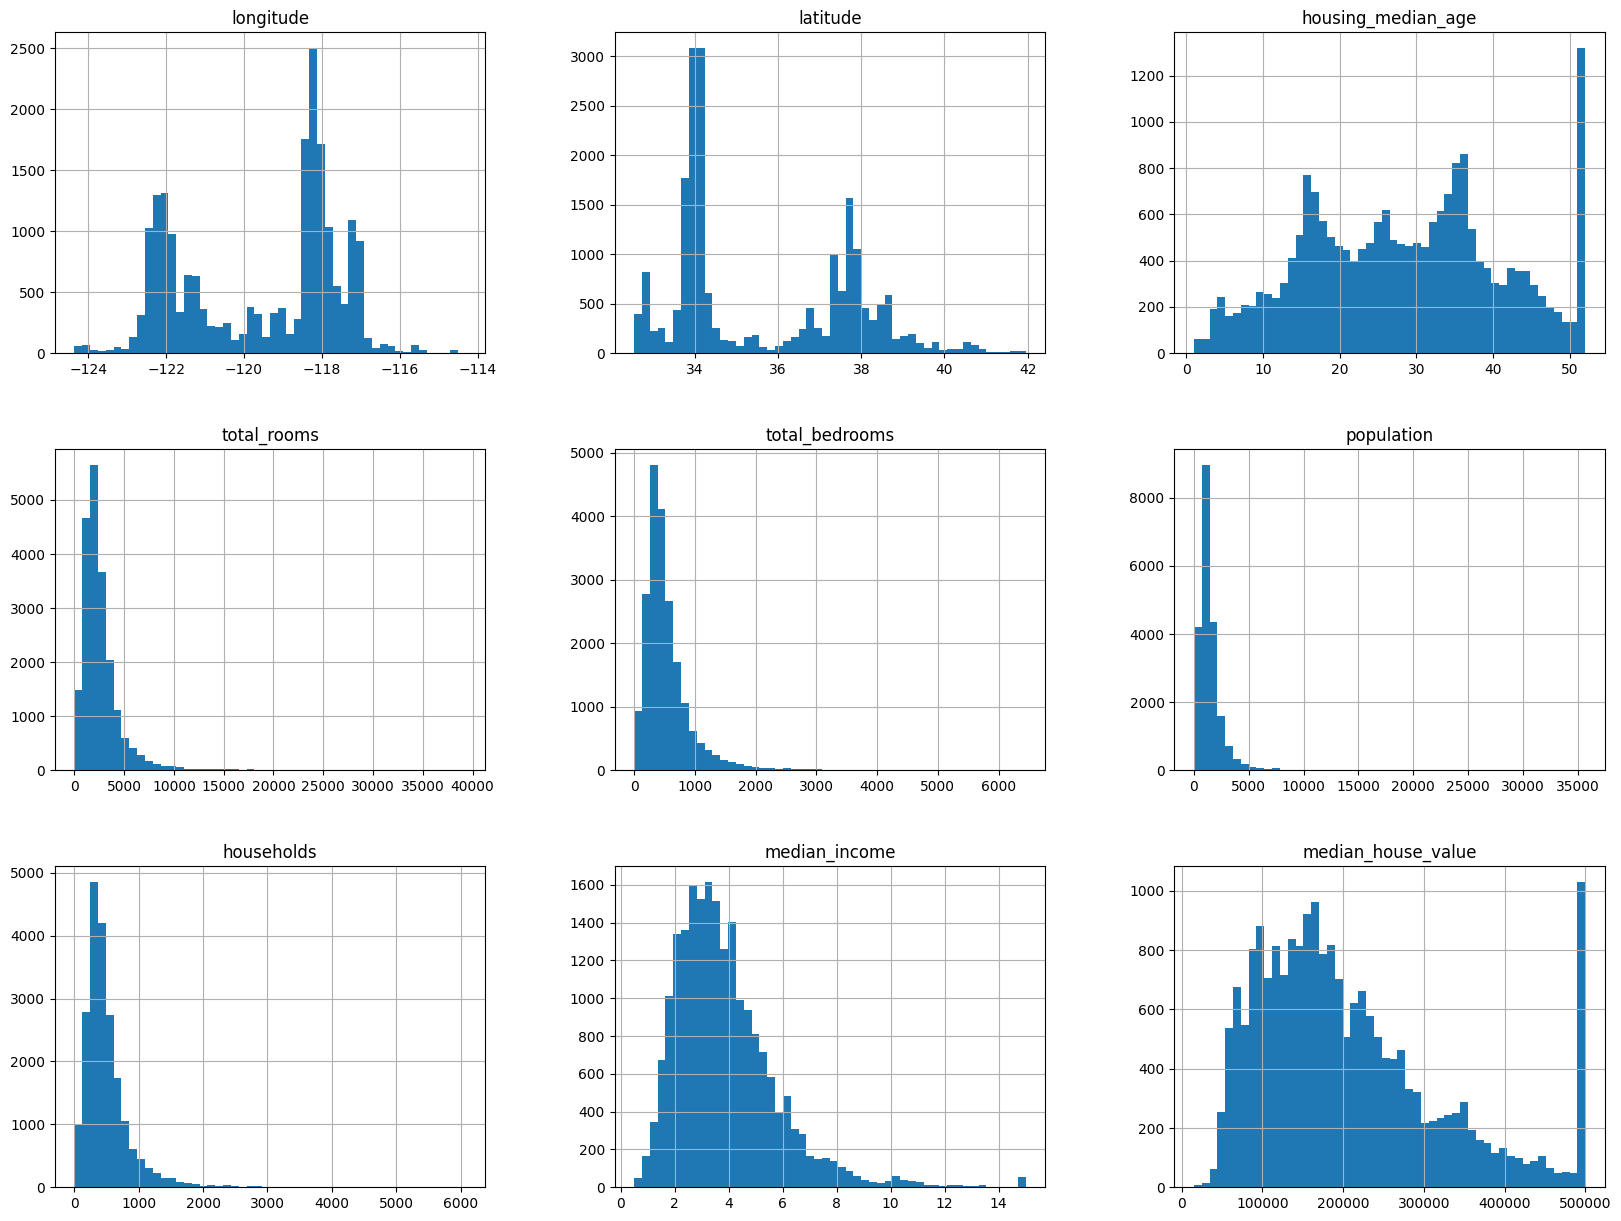

In [6]:
# generamos una matriz con los histogramas de cada columna
%matplotlib inline
import matplotlib.pyplot as plt

#show the histogram of instances.
housing.hist(bins=50, figsize=(20, 15))
plt.show()

#### Create a Test Set
If you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of ML model. When you estimate the generalization error using the test set, your estimate will be too spotimistic and you will launch a system that will not perform well as expected. This is called *data snooping bias*.

In [7]:
import numpy as np

# Generamos una función que nos permita dividir los datos en test y train.
#function for spliting the data
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
# utilizamos la función split_train_test con un 0.2, es decir un 20% para test
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


It works, but it is no perfect: if you run the program again, it will generate different test set! Over time, your ML algorithm will get to see the whole dataset, which is what you want to avoid.

A common solution is to use each instance's identifier to decide wheter or not it should go in the test set. For example, you could compute a hash of each instance's identifier, keep only the last byte of the hash, and put the instance in the test set if this value is lower or equal to 51 (~20% of 256).

In [9]:
from zlib import crc32
# se generan dos funciones: test_set_check y split_train_test_by_id.
def test_set_check(indentifer, test_ratio):
    return cre32(np.in64(indentifer)) & 0xffffffff < test_ratio * 2*32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply (lambda id_: rest_set_check(id_, rest_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

In [10]:
import pandas as pd
import numpy as np
import hashlib

# Función que decide si un ID va al conjunto de test
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# Función para dividir el dataset usando un ID
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# =========================
# Cargar dataset
# =========================
housing = pd.read_csv("datasets/housing/housing.csv")

# Agregar un índice como identificador
housing_with_id = housing.reset_index()

# Dividir en train y test
train_set, test_set = split_train_test_by_id(
    housing_with_id,
    0.2,
    "index"
)

# Ver tamaños
print(len(train_set), "train +", len(test_set), "test")


16362 train + 4278 test


In [11]:
# o utilice las columnas más "estables" para crear un identificador único.
# or use the most stable features to bild an unique identifer
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [12]:
# mostramos los datos con head()
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [13]:
# Se utiliza la función sklearn.model_selection.train_test_split. Y mostramos el resultado
#use scikit-Learn functions to split datasets.
from sklearn.model_selection import train_test_split

train_set, test_Sset = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


So far we have considered pyrely random samplig methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. A *stratified sampling* is when the data to be sampled is divided into homogeneous subgrupos called *strata*, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. Let’s look at the median income histogram more closely.

<Axes: >

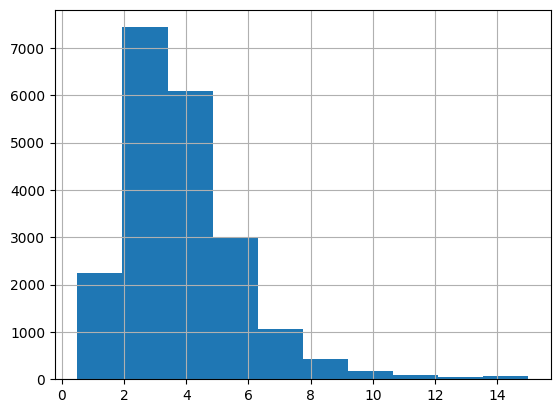

In [14]:
# mostarmos el historial de median_income
housing["median_income"].hist()

It is important to have a sufficient number of instances in your dataset for each
stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not
have too many strata, and each stratum should be large enough. The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5.

In [15]:
# Dividimos por 1.5 para limitar el número de categorias de ingreso
housing["income_cat"] = np.ceil(housing["median_income"] /1.5)

# Etiquete los que están arriba de 5 como 5
housing["income_cat"] = housing["income_cat"].where(
    housing["income_cat"] < 5,
    5.0
)

In [16]:
# utilizamos value_counts para contar los elementos.
import pandas as pd
import numpy as np

housing = pd.read_csv("datasets/housing/housing.csv")
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"] = housing["income_cat"].where(
    housing["income_cat"] < 5,
    5.0
)

housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

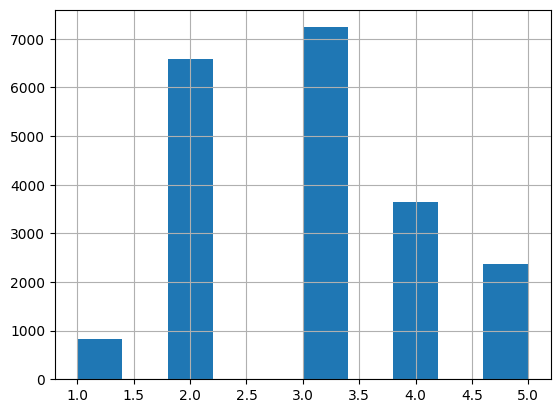

In [17]:
# mostramos el historial
housing["income_cat"].hist()

In [18]:
# Generamos un código para generar conjuntos etratificados
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
# contamos los elementos divididos entre el conjunto estratificado
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [20]:
# entre el total
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [21]:
import pandas as pd

# compararamos las proporciones de las categorías de ingresos en el conjunto de datos general.


# Función para calcular proporciones de income_cat
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# Random split
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
)

# Comparación de proporciones
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# Error porcentual
compare_props["Random, %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)

compare_props["Strat, %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)

In [22]:
compare_props

,Overall,Stratified,Random,"Random, %error","Strat, %error"
income_cat,,,,,
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [23]:
# elimine el atributo income_cat. Los datos vuelven a su estado original.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain insights

In [24]:
# generamos una nueva copia de strat_train_set
housing = strat_train_set. copy()

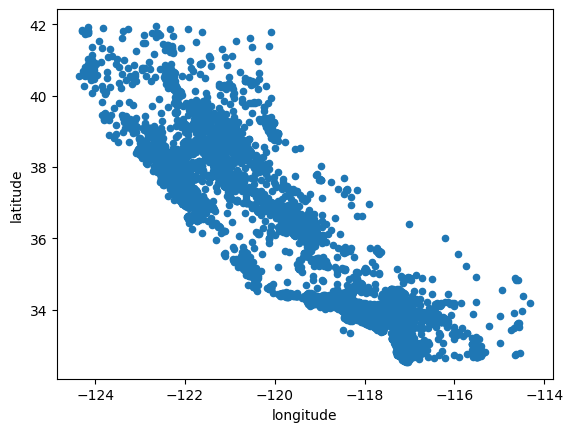

In [25]:
# Generamos una gráfica de disperción utilizando la longitud y la latitud
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

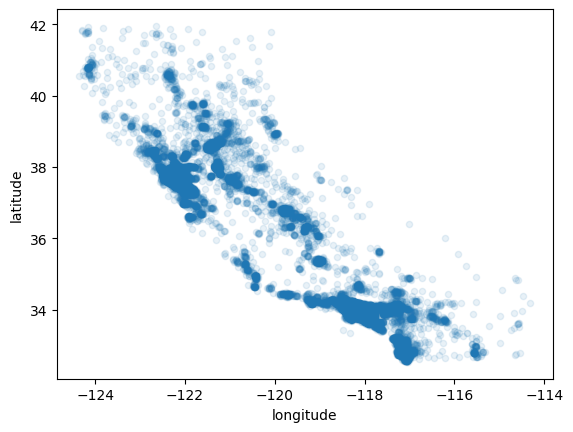

In [26]:
# Mejoramos la visualización del mapa utilizando un alpha de 0.1
# Se mostraŕa que las zonas mas obscuras son la aglomeración de las viviendas
#use alpha to visualize the places where there is a high density of data points. 
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

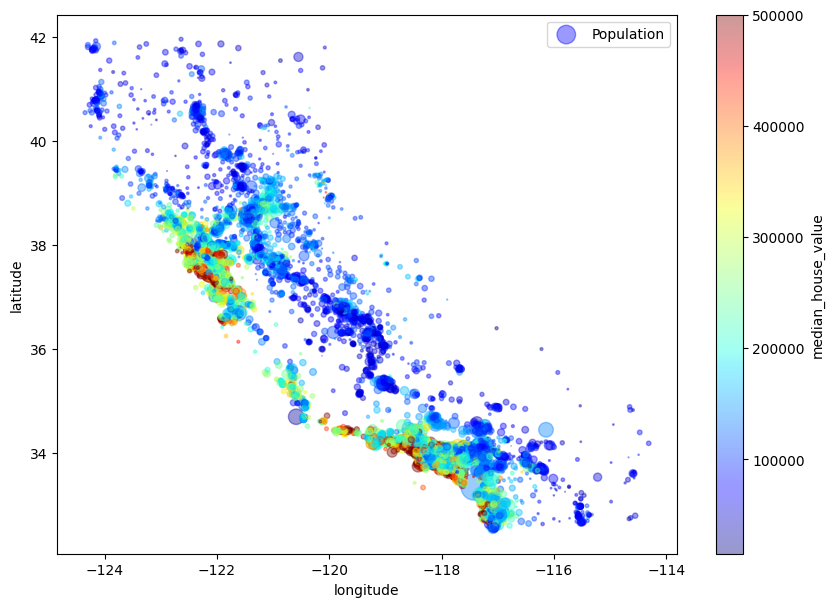

In [27]:
# echemos un vistazo a los precios de la vivienda. El radio de los círculos representa la población
# del distrito y coloreamos el precio.
#let's look at the housing prices. Radius of circles representes the district's population and color the price. 
import matplotlib.pyplot as plt

housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,   # tamaño según población
    label="Population",
    figsize=(10,7),
    c="median_house_value",          # color según precio
    cmap=plt.get_cmap("jet"),
    colorbar=True
)

plt.legend()
plt.show()


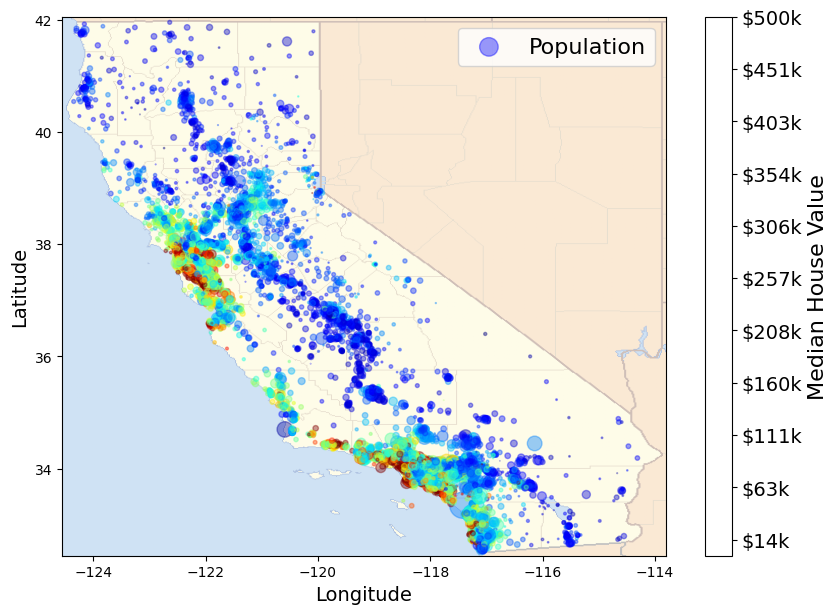

In [28]:
# mostramos los datos sobre el mapa de california, con todo lo anterior
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Cargar imagen del mapa de California
california_img = mpimg.imread("img/california.png")

# Scatter plot
ax = housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="Population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False
)

# Mostrar imagen de fondo
plt.imshow(
    california_img,
    extent=[-124.56, -113.80, 32.45, 42.05],
    alpha=0.5
)

# Etiquetas
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Barra de color
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)

cbar = plt.colorbar()
cbar.ax.set_yticks(tick_values)
cbar.ax.set_yticklabels(
    [f"${int(v/1000)}k" for v in tick_values],
    fontsize=14
)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()


### Looking for correlations

Since the dataset is not too large, you can easily compute the *standard correlation coefficient* (also called *Pearson's r*) between every pair of attibutes using the corr() method.

In [29]:
# generamos la matriz de correlación
corr_matrix = housing.corr(numeric_only=True)

In [30]:
# ordenamos la correlación de mayor a menor de acuerdo a "median_house_value"
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

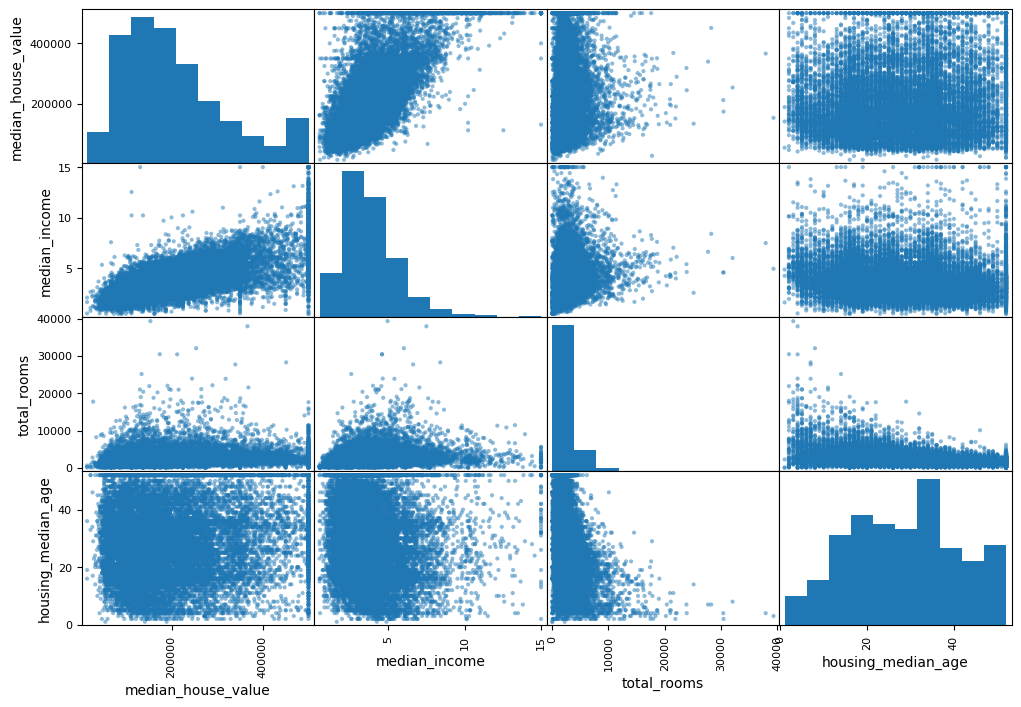

In [31]:
# observamos la correlación de atributos utilizando *scatter_matrix* de pandas
# check correlations between attributes using Pandas' 'scatter_matrix.
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

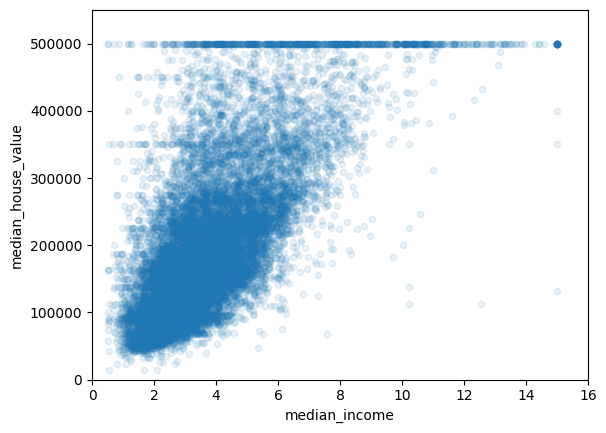

In [32]:
# El atributo más prometedor para predecir el valor medio de la vivienda es el ingreso medio.
# Observamos su grafica de correlación
#The most promising attribute to predict the median house value is the median income. 
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

### Experimenting with attribute combinations
One last this you may want to do before actually preparing the data for Machine learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [33]:
# Generamos nuevos datos utilizando los actuales.
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrroms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [34]:
# volvemos a generar la matriz de correlación
#look the correlation matrix
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrroms_per_room          -0.259952
Name: median_house_value, dtype: float64

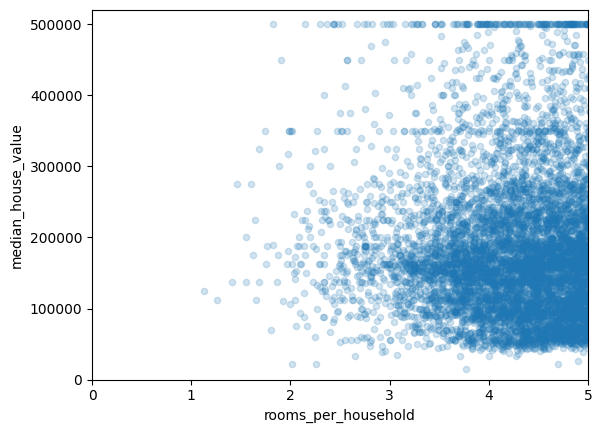

In [35]:
# observamos la grafica de correlación de rooms_per_household
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [36]:
# utilizamos el comando describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrroms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Prepare the data for Machine Learning algorithms
It's time to prepare the data for Machine Learning Algorithms. The reasons for doing that are:
* This will allow you to reproduce thise transformations easily on any dataset (e.g, the next time you get a fresh dataset).
* You will  gradually build a library of transformation functions that you can reuse in future projects.
* You can use these functions in your live systems to transform the new data before feeding it to your algorithms.
* This will make it possible for you to easily try various transformations and see which combination of transformations works best.

In [37]:
# Preparamos los datos.
# separamos las características de sus etiquetas
housing = strat_train_set.drop("median_house_value", axis=1) #drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

Most ML algorithms cannot work with missing features, so lest's case of them. *total_bedrooms* feature has some missing values, for fixing we have three options:

* Get rid of the corresponding districts.
* Get rid of the whole attribute
* Set the values to some value (zero, the main, the median, etc.)

In [38]:
# obtenemos las muestras que tengan datos incompletos (null)
# obtenemos las filas que contienen al menos un valor nulo
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [39]:
# opción 1: Eliminamos las muestras que tengan datos incompletos
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [40]:
# opción 2: eliminamos las columnas
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [41]:
# opción 3: Reemplazamos los valos null por los valores medios.
median = housing ["total_bedrooms"].median() #don't forget save this value traing, test and the live system
sample_incomplete_rows["total_bedrooms"] = sample_incomplete_rows["total_bedrooms"].fillna(median)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


*Scikit-Learn* provides a handy class to take care of missing values: *Imputer*.

In [42]:
# podemos utilizar SampleImputer para rellenar los datos incompletos
try:
    from sklearn.impute import SimpleImputer #for Scikit-Learn v0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we nedd to create a copy of the dta without the text attribute *ocean_proximity*

In [43]:
# quitamos ocean_proximity dado que no es un atributo numérico
housing_num = housing.drop("ocean_proximity", axis=1)

In [44]:
# utilizamos el imputer
imputer.fit(housing_num) #fit the imputer

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [45]:
# mostramos el atributo de statistics_
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [46]:
# checamos manualmente los datos
housing_num.median().values #check the same manually

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
# utilizamos el imputer para transformar el conjunto de entrenamiento
X = imputer.transform(housing_num) #use the trained imputer to transform the training set 

In [48]:
# Generamos un dataframe con a partir de X
housing_tr = pd.DataFrame(X, columns=housing_num.columns) #back as a pandas Dataframe

In [49]:
# mostramos las 5 primeras muestras
housing_cat = strat_train_set[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Handling text and Categorical Attributes
Early we left out the categorical attribute *ocean_proximity* because it is a text attribute so we cannot compute its median. Most ML algorithms prefer to work with numbers anyway, so let's convert these categories from text to numbers.

In [50]:
# generamos una variable housing_cat a aprtir de la columna "ocean_proximity"
# mostramos las primeras 10 muestras.
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [51]:
# utilizamos sklearn.preprocesing.OrdinalEncoder para obtener etiquetas numéricas a partir de los datos no ordinales.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

This is better: *housing_categories* is now purely numerical. *ordinal encoder* retuns the list of categories.

One issue with this representation is that ML algorithms will assume that two nearby values are more similar that two distant values. To fix this issue, a comkmon solution is to create one binary attribute per category, This is called *one-hot encoding*, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [63]:
# mostramos la matriz densa 
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

You can apply both transformation (from text categories to integer, then integer to one-hot vectors) using the *OneHotEncoder* class.

In [64]:
# realizamos el mismo proceso
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [66]:
# mostramos la matriz
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [68]:
# Generamos la matriz densa,
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [69]:
# obtenemos las categorias
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> If a categorical attribute has a large number of possible categories, then one-hot encoding will result in a large number of input features. This may slow down training and degraded performance. If this happens, you will want to produce denser representations. If this happends, you will want to produce denser represenations called *embeddings*, but this requires a good understanding of neural networks.

#### Custom transformers

Although Scikit-Learn provides may useful transformers, you will need to write your own for task such as custom cleanup operations or combining specific atribbutes. Remenber, Scikit-Learns relies on duck typing, you need to create a class and implement three methods: *fit()* (returning *self*, *transform()*, and *fit_transform()*.

In [72]:
# generamos una clase propia para ralizar la combinación de los atributos
# from combined_attributes_adder import CombinedAttributesAdder

from combined_attributes_adder import CombinedAttributesAdder

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [73]:
# Generamos el data frame con los datos extra
housing_extra_attribs = pd.DataFrame(
housing_extra_attribs,
columns=list(housing.columns) + ["rooms_per_household",
"population_per_household"])
housing_extra_attribs.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,rooms_per_household,population_per_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.027028,0.067465
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.025670,0.055727
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.028361,0.074036
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.028350,0.067317
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.028562,0.057635


#### Transformation Pipelines

There are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the *pipeline* class to help with such sequences of transformations.

In [75]:
# generamos un pipeline con imputer, combinación de atributos y standarscaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [76]:
# mostramos los datos numericos obtenidos del pipeline
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]], shape=(16512, 11))

In [78]:
# Restablecemos housing al estado correcto para el pipeline
housing = strat_train_set.drop("median_house_value", axis=1)

housing_num = housing.drop("ocean_proximity", axis=1)


In [79]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]


Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into our pipeline, insted of having to first manually extract the numerical columns into a Numpy array. There is nothing in Scikit-Learn to handle Pandas DataFrames, but we can write a custom transformer for this task:

In [80]:
# agregamos al pipeline la transformación de los atributos categoricos
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [81]:
# mostramos los datos preparados
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

In [83]:
# mostramos las dimensiones del data set
housing_prepared.shape

(16512, 16)

### Select and Train a Model

#### Training and Evaluating on theTraining Set
Les's train a **Linear Regression** model, like previous.

In [84]:
# generamos un modelo lineal (sklearn.linear_model.LinearRegression) para generar un modelo.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Done!. You now have a working Linear Regression model. Let's try it out on a few instances from the training set:

In [86]:
# realizamos predicciones 
some_data = housing.iloc[:6]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089 206382.40770567]


It works, but it's not perfect. The first prediction is off by close to 40%. Let's meausre this model on the whole training set using Scikit-Learn's mean_squared_error function:

In [88]:
# Comparamos los datos esperados vs los datos obtenidos
print("Expected:", some_labels, "\n", "Obtained",
lin_reg.predict(some_data_prepared))

Expected: 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64 
 Obtained [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089 206382.40770567]


In [90]:
# utilizando sklearn.metrics.mean_squared_error obtenemos el rmse de las predicciones.
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_msc = mean_squared_error(housing_labels, housing_predictions)
lin_rmsc = np.sqrt(lin_msc)
lin_rmsc

np.float64(68627.87390018745)

In [91]:
# utilizamos mean_absolute_error para obtener el mae
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.668609158005

 This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.
 
 Let's train a *DecisionTreeRegressior*. This is a powerful model, capable of finding complex nonlinear relationships in the data.

In [93]:
# generamos un nuevo modelo utilizando sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [94]:
# generamos las predicciones con el nuevo modelo.
housing_predictions = tree_reg.predict(housing_prepared)
tree_msc = mean_squared_error(housing_labels, housing_predictions)
tree_rmsc = np.sqrt(tree_msc)
tree_rmsc

np.float64(0.0)

### Better Evaluation Using Cross-Validation

 We use Scikit-Learn's *cross-validation* feature. The following code performs *K-fold cross-validation*: it randomly splits the training set into 10 distinct subset called *folds*, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [95]:
# utilizamos sklearn.model_selection.cross_val_score para evaluar el modelo mediente cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

> Scikit-Learn cross-validation features expect a utility function rather than a cost function.

In [96]:
# Definimos una función que nos permita mostar las metricas de evaluación
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [71909.72952111 71493.27053647 67832.42933299 71863.88820642
 70045.80640778 77334.91971731 71099.40865611 73168.41344476
 69440.26534401 71164.1094466 ]
Mean: 71535.22406135606
Standard deviation: 2391.639160093955


In [98]:
# utilizamos validación cruzada para evaluar el modelo lineal, generado anteriormente
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


Note that the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression Model.

Let's try one last model: *RandomForestRegressor*.

In [99]:
# Generamos un nuevo modelo. Utilizamos sklearn.ensemble.RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [100]:
# generamos las predicciones y obtenemos el rmse
housing_predictions = forest_reg.predict(housing_prepared)
forest_msc = mean_squared_error(housing_labels, housing_predictions)
forest_rmsc = np.sqrt(forest_msc)
forest_rmsc

np.float64(22413.454658589766)

In [102]:
# utilizamos validación cruzada para evaluar el modelo
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard deviation: 2262.8151900582


Random Forest look promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solution for overfitting are to simplify the model, constraint it (i.e., regularize it), or get a lot more training data.

> for saving models that you experiment with can use the *pickle* module, or use sklean-externals.joblib.
> ```python
>  from sklearn.externals import joblib
>  
>  joblib.dump(my_model, "my_model.pkl") # save
>  my_model_loaded = joblib.load("my_model.pkl") # load
> ```

### Fine-Tune your model
Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. 

#### Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of  hyperparameter values. This would be very tedious work and time consuming.

In [103]:
# utilizamos validación cruzada para obtener el rmse de tree_reg
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [104]:
# mostramos sus scores mediante la función display_scores, previamente definida
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [72508.79861641 71482.74987257 68744.68157251 71312.46972489
 69623.82670887 76479.06152999 71786.27768849 73975.69869556
 68891.2875336  70590.79254522]
Mean: 71539.56444880992
Standard deviation: 2253.517779212277


In [106]:
# volvemos a obtener los valroes del modelo lin_reg a partir de la validación cruzada
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


In [107]:
# obtenemos un nuevo modelo utilizando sklearn.ensamble.RandomForestRegressor
# volvemos a obtener los valroes del modelo lin_reg a partir de la validación cruzada
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [108]:
# obtenemos su rmse
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(22413.454658589766)

In [109]:
# obtenemos sus scores utilizando validación cruzada
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard deviation: 2262.8151900582


In [110]:
# describimos los scores de los resultados obtenidos de la validación cruzada del modelo lin_reg
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [113]:
# utilizamos GridSearchCV para obtener un modelo optimizado de sus hyperparametros
from sklearn.model_selection import GridSearchCV

param_grid = [
    #intenta 12 (3x4) combinaciones de hiperparametros
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # despues intenta (2x3) combinaciones con bootstrap set como falso
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring ='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the comput

In [114]:
# mostramos los mejores parámetros
grid_search.best_estimator_

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",30
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",8
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [116]:
# Obtenemos el mejor modelo
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

> If *GridSearchCV is initialized with refit=True, then once it finds the best estimator using crossvalidation, it retrains it on the whole training set.

Let's look at the score of each hyperparameter combination tested during the grid search:

In [117]:
# mostramos los resultados de cada modelo
models_scores = pd.DataFrame({
    "Modelo": ["Linear Regression", "Decision Tree", "Random Forest"],
    "RMSE medio": [
        lin_rmse_scores.mean(),
        tree_rmse_scores.mean(),
        forest_rmse_scores.mean()
    ],
    "Desviación estándar": [
        lin_rmse_scores.std(),
        tree_rmse_scores.std(),
        forest_rmse_scores.std()
    ]
})

models_scores

,Modelo,RMSE medio,Desviación estándar
0,Linear Regression,69104.079982,2880.328210
1,Decision Tree,71539.564449,2253.517779
2,Random Forest,52792.926691,2262.815190


#### Randomized Search
The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter *search space* is large, it is often preferable to use *RandomizedSearchCV*. This approach has two main benefits:

* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

In [126]:
# utilizamos sklearn.model_selection.RandomizedSearchCV para una búsqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5,
                               scoring='neg_mean_squared_error',
                               random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_features': <scipy.stats....00239A2F71850>, 'n_estimators': <scipy.stats....00239A2F71550>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:

In [122]:
# mostramos los resultados de cada modelo
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


#### Analyze the Best models and their errors
You will often gain good insights on the problem by inspecting the best models. For example, the
RandomForestRegressor can indicate the relative importance of each attribute for making accurate
predictions:

In [123]:
# mostramos la importancia de las características
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [129]:
# mostramos la importancia y sus nombres, de forma ordenada.
extra_attribs = ["room_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3790092248170967), 'median_income'),
 (np.float64(0.16570630316895876), 'INLAND'),
 (np.float64(0.10703132208204354), 'pop_per_hhold'),
 (np.float64(0.06965425227942929), 'longitude'),
 (np.float64(0.0604213840080722), 'latitude'),
 (np.float64(0.05477891501828372), 'room_per_hhold'),
 (np.float64(0.048203121338269206), 'bedrooms_per_room'),
 (np.float64(0.04218822024391753), 'housing_median_age'),
 (np.float64(0.015849114744428634), 'population'),
 (np.float64(0.015554529490469328), 'total_bedrooms'),
 (np.float64(0.01524505568840977), 'total_rooms'),
 (np.float64(0.014934655161887774), 'households'),
 (np.float64(0.006792660074259966), '<1H OCEAN'),
 (np.float64(0.0030281610628962747), 'NEAR OCEAN'),
 (np.float64(0.0015247327555504937), 'NEAR BAY'),
 (np.float64(7.834806602687504e-05), 'ISLAND')]

Whith this information, you may want to try dropping some of the less useful features.

#### Evaluate Your system on the test set
Now is the time to evaluate the final model on the test set.

In [130]:
# evaluamos el modelo final vs el conjunto de entrenamiento
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(47873.26095812988)